# Neural Networks (Deep Learning)

In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## 1. 신경망 모델 (Neural Network Model)

* **다층 퍼셉트론** (MLP, MultiLayer Perceptrons)은 여러 단계를 거쳐 결정을 만들어내는 선형 모델의 일반화된 모습이라고 볼 수 있음
$$ \hat { y } =w[0]\times x[0]+w[1]\times x[1]+\dots +w[p]\times x[p]+b $$
* 이를 그림으로 나타내면 아래와 같이 나타낼 수 있음
* 왼쪽 노드는 입력값(input)을 나타내며, 연결선은 학습된 계수(parmeter)를 표현하고 오른쪽 노드는 입력과 계수의 곱의 합, 즉 출력값(output)을 나타냄

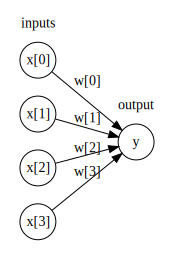

In [4]:
from IPython.display import display
display(mglearn.plots.plot_logistic_regression_graph())

* MLP(MultiLayer Perceptrons)에서는 가중치의 합을 만드는 과정이 여러번 반복되며, 아래의 그림과 같이 먼저 중간 단계를 구성하는 **은닉 유닛**(Hidden unit)을 계산하고 이를 이용하여 최종 결과를 산출하기 위해 다시 가중치의 합을 계산함 

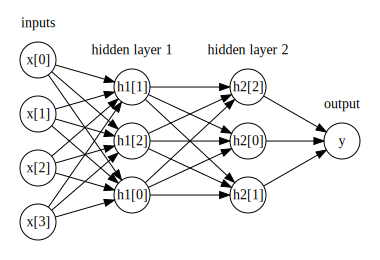

In [7]:
display(mglearn.plots.plot_two_hidden_layer_graph())

* 신경망 모델이 선형모델 보다 강력(?)하게 하기 위해 각 은닉 유닛의 가중치 합을 계산한 후 그 결과에 비선형 함수인 **ReLu** 나 **tanh** 등의 활성화 함수를 적용

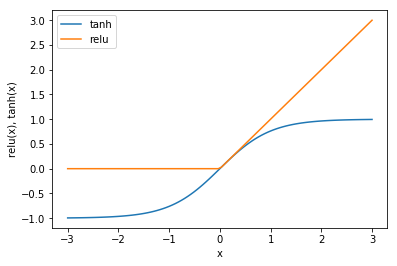

In [6]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

## 2. 신경망 튜닝 (Tuning Neural Networks)

### sklearn.neural_network.[MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
* scikit-learn이 제공하는 뉴럴 네트워크의 다층퍼셉트론 MLPClassifier 클래스

### MLPClassifier 주요 Parameters
* **hidden_layer_sizes**: 은닉층의 유닛의 개수를 지정하는 parameter이며, default는 100개이다.
* **activation**: 활성화 함수를 선택할 수 있는 parameter
    * {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, 네가지가 있으며, default는 ‘relu’이다.
    * ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
    * ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
    * ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
    * ‘relu’, the rectified linear unit function, returns f(x) = max(0, x) 

* **solver**: 가중치 값을 최적화 할 방법을 선택하는 parameter
    * {‘lbfgs’, ‘sgd’, ‘adam’}, 세가지가 있으며 default는 ‘adam’이다.
    * ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
    * ‘sgd’ refers to stochastic gradient descent.
    * ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

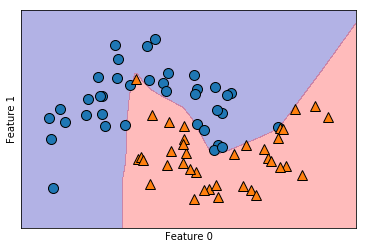

In [12]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

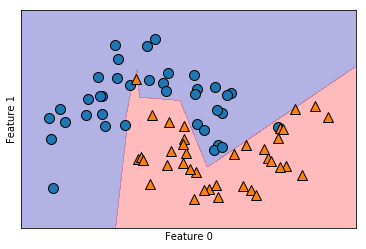

In [13]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

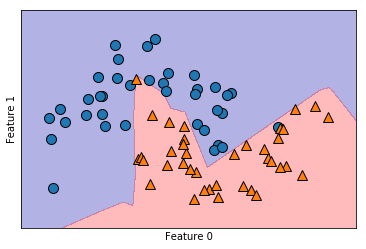

In [14]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

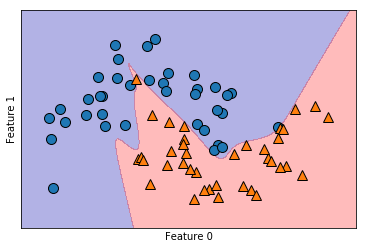

In [15]:
# tanh 활성화 함수 적용 및 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

* 신경망에서 복잡도를 제어 하는 방법은 여러가지가 있으며, L2 패널티인 Regularization을 사용해서 가중치 파라미터인 $w$를 0에 가깝게 감소시켜 모델의 복잡도를 제어할 수 있음
* **alpha**: L2 패널티 값을 지정해주는 parameter

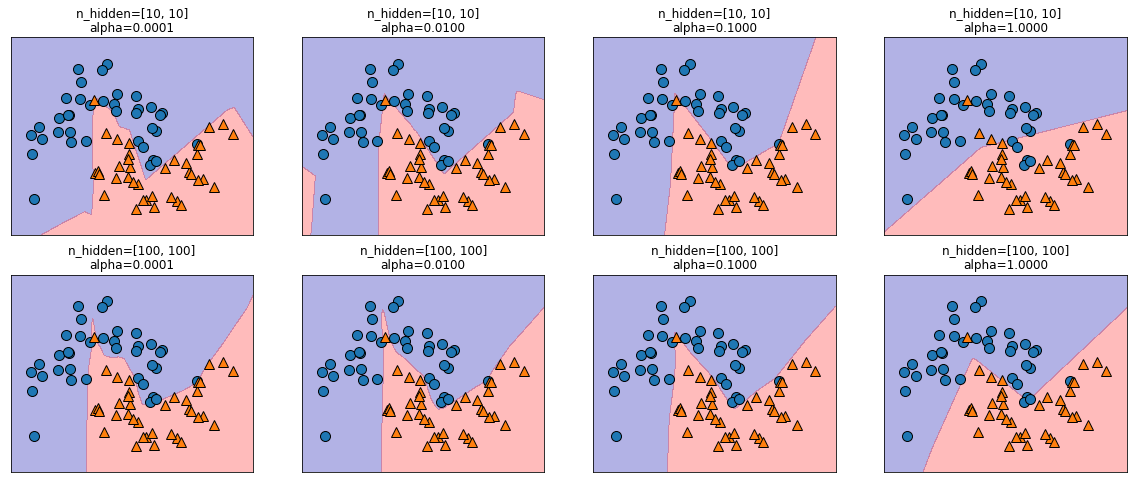

In [16]:
# 은닉 유닛과 alpha 매개변수에 따라 변하는 결정경계
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

* 신경망 모델에서는 초기값을 어떻게 주느냐에 따라 성능이 달라지기도 함

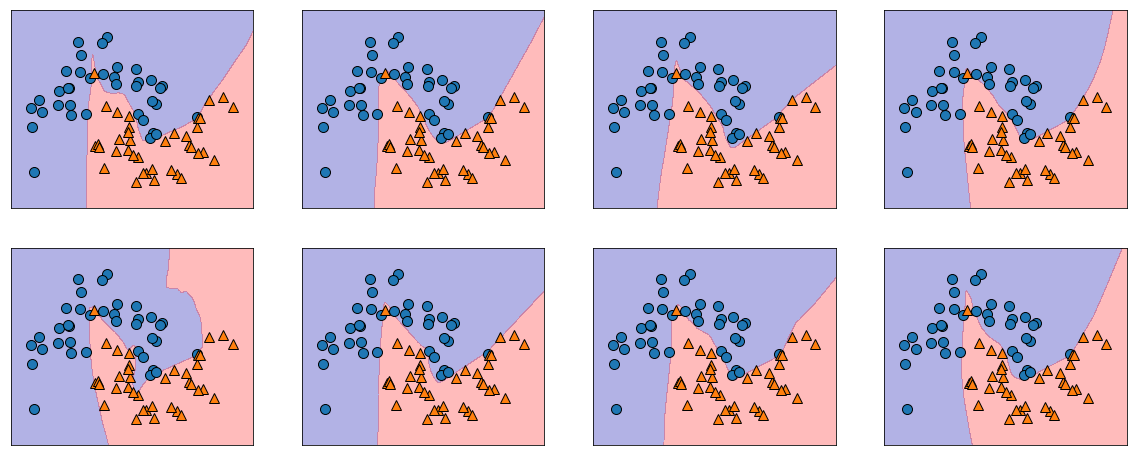

In [17]:
# 같은 가중치 파라미터 값에, 랜덤하게 다른 초기값을 설정
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)